## Importing Required Libraries

In [2]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [3]:
TRAIN_DIR = "./dataset/train"
TEST_DIR = "./dataset/test"
BATCH_SIZE=64

### Will see how many categories and images present

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


### Will see some random images withe their labels

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(od.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [18]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

### Preparing data for training

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [8]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [14]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
180/180 [==============================] - 175s 962ms/step - loss: 1.7369 - accuracy: 0.2602 - val_loss: 1.5757 - val_accuracy: 0.3512
Epoch 2/50
180/180 [==============================] - 196s 1s/step - loss: 1.4669 - accuracy: 0.4050 - val_loss: 1.3578 - val_accuracy: 0.4492
Epoch 3/50
180/180 [==============================] - 182s 1s/step - loss: 1.2669 - accuracy: 0.4919 - val_loss: 1.1265 - val_accuracy: 0.5494
Epoch 4/50
180/180 [==============================] - 163s 905ms/step - loss: 1.1049 - accuracy: 0.5649 - val_loss: 1.0495 - val_accuracy: 0.5911
Epoch 5/50
180/180 [==============================] - 164s 908ms/step - loss: 0.9866 - accuracy: 0.6146 - val_loss: 0.9312 - val_accuracy: 0.6321
Epoch 6/50
180/180 [==============================] - 170s 946ms/step - loss: 0.9085 - accuracy: 0.6485 - val_loss: 0.9345 - val_accuracy: 0.6412
Epoch 7/50
180/180 [==============================] - 169s 938ms/step - loss: 0.8352 - accuracy: 0.6786 - val_loss: 0.7908 - val_a

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluating the model

In [15]:
classifier.evaluate(test_set)

23/23 [==============================] - 6s 240ms/step - loss: 0.3214 - accuracy: 0.8908


[0.32136282324790955, 0.8908205628395081]

NameError: name 'plr' is not defined

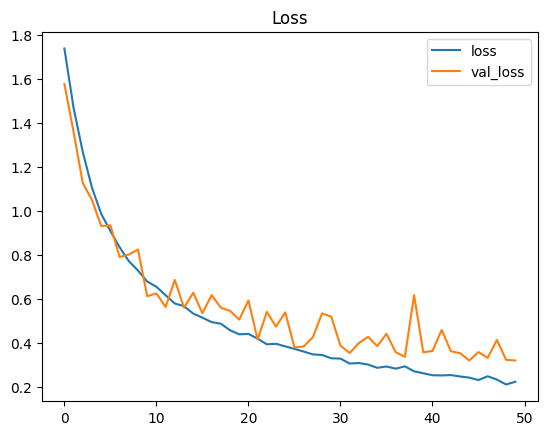

In [16]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plr.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

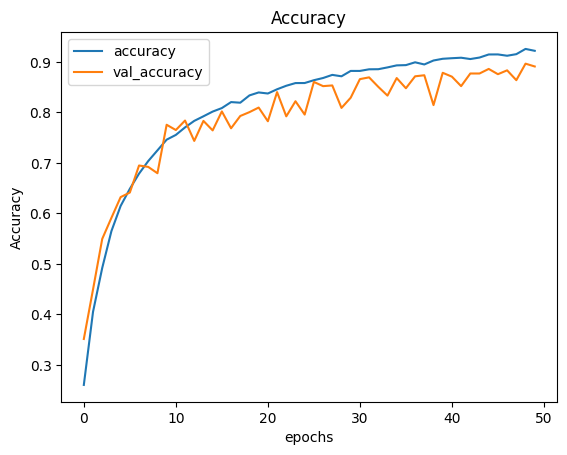

In [18]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [19]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("00000.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 108ms/step


3

In [20]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}